In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import skfuzzy as fuzz

In [2]:
def load_image(image_path):
    image = Image.open(image_path)
    return np.array(image)

def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def fuzzy_c_means_clustering(image_data, clusters=3, fuzziness=2, max_iterations=100, tolerance=1e-5):
    pixels = normalize_data(image_data.reshape((-1, 3)))

    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        pixels.T, clusters, fuzziness, error=tolerance, maxiter=max_iterations, init=None, seed=None
    )

    segmented_image = np.argmax(u, axis=0)

    segmented_image = cntr[segmented_image].T.reshape(image_data.shape)

    return segmented_image

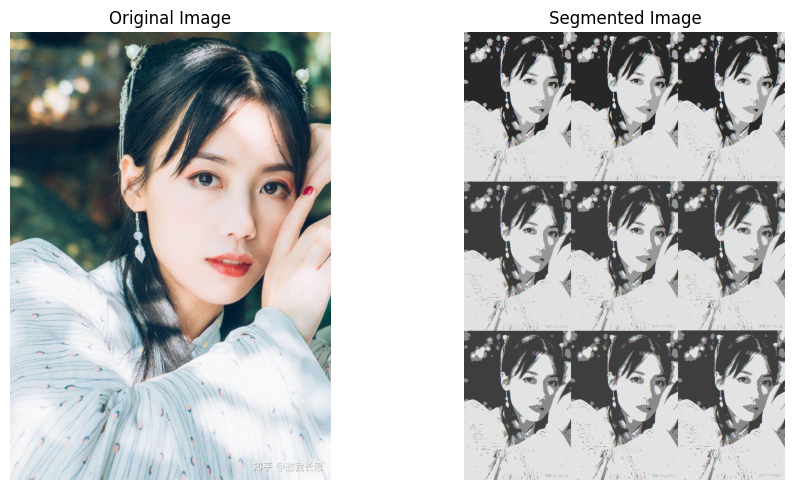

In [3]:

image_path = 'photo.jpg'
image = load_image(image_path)
segmented_image = fuzzy_c_means_clustering(image, clusters=3)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.axis('off')

plt.tight_layout()
plt.show()